In [2]:
import re
import pandas as pd

In [3]:
f = open('dataset/WhatsApp Chat with bhai log.txt', 'r', encoding='utf-8')

In [4]:
data = f.read()

In [5]:
print(data)

8/23/17, 20:33 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
1/8/14, 15:02 - +91 98992 36546 created group "bhai log"
8/23/17, 20:33 - Aqib Lko added you
8/23/17, 20:35 - Dr. Jaun: 12 number gali ke corner pe jo restaurant hai wahan atey ki chapati milti hai
8/23/17, 20:35 - Nadeem Bhai: Pls save for me
8/23/17, 20:35 - Dr. Jaun: 3rupees each
8/23/17, 20:36 - Dr. Jaun: Aap kaun hai bhai ?
8/23/17, 20:39 - Zeeshan Arif: Ha bhai wahi milti hai
8/23/17, 20:57 - Abdullah bhai Delhi: Khana kha kr aaoge?
8/23/17, 20:58 - Abdullah bhai Delhi: Farzan
8/23/17, 20:59 - Zeeshan Arif: Ji
8/23/17, 21:05 - Abdullah bhai Delhi: Ok
8/23/17, 22:30 - Fahad Bhai Delhi Bangalore: Awesome jaun bhai
9/23/17, 23:18 - Fahad Bhai Delhi Bangalore: <Media omitted>
9/23/17, 23:23 - Fahad Bhai Delhi Bangalore: <Media omitted>
9/23/17, 23:47 - Fahad Bhai Delhi Bangalore: Anybody has an Hdfc credit card ... want to buy a 

In [6]:
print(type(data))

<class 'str'>


In [7]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [8]:
messages = re.split(pattern, data)[1:]
print(messages)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', '+91 98992 36546 created group "bhai log"\n', 'Aqib Lko added you\n', 'Dr. Jaun: 12 number gali ke corner pe jo restaurant hai wahan atey ki chapati milti hai\n', 'Nadeem Bhai: Pls save for me\n', 'Dr. Jaun: 3rupees each\n', 'Dr. Jaun: Aap kaun hai bhai ?\n', 'Zeeshan Arif: Ha bhai wahi milti hai\n', 'Abdullah bhai Delhi: Khana kha kr aaoge?\n', 'Abdullah bhai Delhi: Farzan\n', 'Zeeshan Arif: Ji\n', 'Abdullah bhai Delhi: Ok\n', 'Fahad Bhai Delhi Bangalore: Awesome jaun bhai\n', 'Fahad Bhai Delhi Bangalore: <Media omitted>\n', 'Fahad Bhai Delhi Bangalore: <Media omitted>\n', 'Fahad Bhai Delhi Bangalore: Anybody has an Hdfc credit card ... want to buy a fridge ... cash back hai uspar... will pay in full ...\n', 'Dr. Jaun: 🤗\n', 'Abdullah bhai Delhi: Fazlu wher r u?\n', 'Dr. Jaun: <Media omitted>\n', 'Fahad Bhai Delhi Bangalore: <Media omitted>\

In [9]:
dates = re.findall(pattern, data)
print(dates)

['8/23/17, 20:33 - ', '1/8/14, 15:02 - ', '8/23/17, 20:33 - ', '8/23/17, 20:35 - ', '8/23/17, 20:35 - ', '8/23/17, 20:35 - ', '8/23/17, 20:36 - ', '8/23/17, 20:39 - ', '8/23/17, 20:57 - ', '8/23/17, 20:58 - ', '8/23/17, 20:59 - ', '8/23/17, 21:05 - ', '8/23/17, 22:30 - ', '9/23/17, 23:18 - ', '9/23/17, 23:23 - ', '9/23/17, 23:47 - ', '9/23/17, 23:47 - ', '9/24/17, 18:04 - ', '9/25/17, 00:05 - ', '9/25/17, 10:56 - ', '9/26/17, 06:23 - ', '9/27/17, 23:46 - ', '9/28/17, 09:53 - ', '9/29/17, 12:22 - ', '9/29/17, 15:31 - ', '9/30/17, 10:16 - ', '9/30/17, 10:49 - ', '9/30/17, 11:31 - ', '9/30/17, 11:36 - ', '10/3/17, 13:56 - ', '10/3/17, 15:23 - ', '10/4/17, 12:53 - ', '10/5/17, 00:54 - ', '10/5/17, 01:11 - ', '10/6/17, 16:49 - ', '10/6/17, 17:09 - ', '10/6/17, 18:29 - ', '10/6/17, 18:29 - ', '10/6/17, 18:30 - ', '10/6/17, 18:30 - ', '10/6/17, 18:31 - ', '10/6/17, 22:38 - ', '10/6/17, 22:39 - ', '10/6/17, 22:39 - ', '10/6/17, 22:39 - ', '10/6/17, 22:39 - ', '10/6/17, 22:39 - ', '10/6/17, 22:

In [10]:
df = pd.DataFrame({"user_message": messages, "message_date": dates})

In [11]:
df["message_date"] = pd.to_datetime(df["message_date"], format='%m/%d/%y, %H:%M - ')

In [12]:
df.rename(columns = {"message_date": 'date'}, inplace=True)

In [13]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2017-08-23 20:33:00
1,"+91 98992 36546 created group ""bhai log""\n",2014-01-08 15:02:00
2,Aqib Lko added you\n,2017-08-23 20:33:00
3,Dr. Jaun: 12 number gali ke corner pe jo resta...,2017-08-23 20:35:00
4,Nadeem Bhai: Pls save for me\n,2017-08-23 20:35:00


In [14]:
print(type(df["user_message"][0]))
print(type(df["date"][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Here it is verified that the "date" feature is converted to datetime format. And our message feature is still in string.

In [15]:
# to check the shape of dataframe

df.shape

(18189, 2)

We now have to seperate username (who sent the message) and message (what he/she sent) into different columns

In [16]:
users = []
messages = []
for message in df["user_message"]:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])


In [17]:
df['users'] = users
df['messages'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,users,messages
0,2017-08-23 20:33:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2014-01-08 15:02:00,group_notification,"+91 98992 36546 created group ""bhai log""\n"
2,2017-08-23 20:33:00,group_notification,Aqib Lko added you\n
3,2017-08-23 20:35:00,Dr. Jaun,12 number gali ke corner pe jo restaurant hai ...
4,2017-08-23 20:35:00,Nadeem Bhai,Pls save for me\n


Now, we have seperated username and message and date on which that message was sent properly.

We can even see that incase any notification occurred, group_notification is printed under users feature.

In [18]:
df["year"] = df["date"].dt.year

In [19]:
df["month"] = df["date"].dt.month_name()

In [20]:
df["day"] = df["date"].dt.day

In [21]:
df["hour"] = df["date"].dt.hour

In [22]:
df["minute"] = df["date"].dt.minute

In [23]:
df.head()

,date,users,messages,year,month,day,hour,minute
0,2017-08-23 20:33:00,group_notification,Messages and calls are end-to-end encrypted. N...,2017,August,23,20,33
1,2014-01-08 15:02:00,group_notification,"+91 98992 36546 created group ""bhai log""\n",2014,January,8,15,2
2,2017-08-23 20:33:00,group_notification,Aqib Lko added you\n,2017,August,23,20,33
3,2017-08-23 20:35:00,Dr. Jaun,12 number gali ke corner pe jo restaurant hai ...,2017,August,23,20,35
4,2017-08-23 20:35:00,Nadeem Bhai,Pls save for me\n,2017,August,23,20,35


In [24]:
df[df["users"] == "Zeeshan Arif"].shape[0]

1543

In [25]:
words = []

for message in df["messages"]:
    words.extend(message.split())

In [26]:
# total number of words typed by all members of this group
len(words)

116322

In [27]:
# total number of media files
df[df["messages"] == "<Media omitted>\n"].shape[0]

2012

In [28]:
!pip install urlextract

In [29]:
# from urlextract import URLExtract

# extract = URLExtract()
# urls = extractor.find_urls("Lets www.gmail.com to the best email service slack.com is best for chatting https://www.facebook.com is good for finding friends, upload file ftp://url.in")
# urls

In [30]:
df.head()

,date,users,messages,year,month,day,hour,minute
0,2017-08-23 20:33:00,group_notification,Messages and calls are end-to-end encrypted. N...,2017,August,23,20,33
1,2014-01-08 15:02:00,group_notification,"+91 98992 36546 created group ""bhai log""\n",2014,January,8,15,2
2,2017-08-23 20:33:00,group_notification,Aqib Lko added you\n,2017,August,23,20,33
3,2017-08-23 20:35:00,Dr. Jaun,12 number gali ke corner pe jo restaurant hai ...,2017,August,23,20,35
4,2017-08-23 20:35:00,Nadeem Bhai,Pls save for me\n,2017,August,23,20,35


In [31]:
# top 5 busy users (remove .head() and you will see every user)
# who messaged most or how many times each user messaged

df["users"].value_counts().head()

Abdullah bhai Delhi    3648
Nadeem Bhai            3000
Subbu Bhai             2549
Aqib Lko               2267
Dr. Jaun               2255
Name: users, dtype: int64

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
x = df["users"].value_counts().head()

In [34]:
name = x.index
count = x.values

Text(0.5, 0, 'Number of messages')

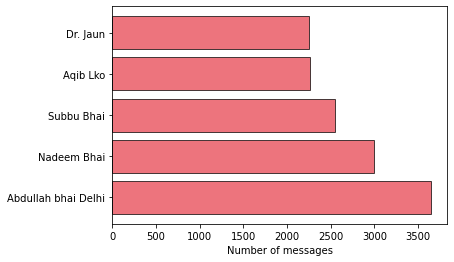

In [35]:
plt.barh(name, count, color="#e63946", alpha=0.7, edgecolor='black')
plt.xlabel("Number of messages")
#plt.ylabel("User name")
#plt.xticks(rotation="vertical")

In [36]:
round((df["users"].value_counts() / df.shape[0])*100, 2)

Abdullah bhai Delhi           20.06
Nadeem Bhai                   16.49
Subbu Bhai                    14.01
Aqib Lko                      12.46
Dr. Jaun                      12.40
Zeeshan Arif                   8.48
+91 96250 85822                5.54
Fahad Bhai Delhi Bangalore     4.35
Saeed Bhai                     3.68
+91 96965 65288                2.31
group_notification             0.19
+91 78979 61900                0.03
Name: users, dtype: float64

In [37]:
round((df["users"].value_counts() / df.shape[0])*100, 2).reset_index().rename(columns={'index':'name', 'users':'percent'})

,name,percent
0,Abdullah bhai Delhi,20.06
1,Nadeem Bhai,16.49
2,Subbu Bhai,14.01
3,Aqib Lko,12.46
4,Dr. Jaun,12.40
5,Zeeshan Arif,8.48
6,+91 96250 85822,5.54
7,Fahad Bhai Delhi Bangalore,4.35
8,Saeed Bhai,3.68
9,+91 96965 65288,2.31


In [38]:
# remove group_notification
temp = df[df["users"] != "group_notification"]

# remove '<Media omitted>\n'
temp = temp[temp["messages"] != "<Media omitted>\n"]

# remove punctuation
#temp = temp['messages'].str.replace(r'[^\w\s]+', '')

In [39]:
temp

,date,users,messages,year,month,day,hour,minute
3,2017-08-23 20:35:00,Dr. Jaun,12 number gali ke corner pe jo restaurant hai ...,2017,August,23,20,35
4,2017-08-23 20:35:00,Nadeem Bhai,Pls save for me\n,2017,August,23,20,35
5,2017-08-23 20:35:00,Dr. Jaun,3rupees each\n,2017,August,23,20,35
6,2017-08-23 20:36:00,Dr. Jaun,Aap kaun hai bhai ?\n,2017,August,23,20,36
7,2017-08-23 20:39:00,Zeeshan Arif,Ha bhai wahi milti hai\n,2017,August,23,20,39
...,...,...,...,...,...,...,...,...
18182,2022-03-24 17:47:00,Abdullah bhai Delhi,"Time to sell govt. school, colleges and univer...",2022,March,24,17,47
18183,2022-03-26 11:52:00,Nadeem Bhai,,2022,March,26,11,52
18184,2022-03-27 17:38:00,Abdullah bhai Delhi,,2022,March,27,17,38
18185,2022-03-29 22:35:00,Nadeem Bhai,https://youtu.be/fawqnsZKY30\n,2022,March,29,22,35


In [40]:
f = open("stop_hinglish.txt", "r")
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [41]:
f_h = open("stopwords_hindi.txt", "r", encoding="utf-8")
stop_words_hindi = f_h.read()
print(stop_words_hindi)

मैं
मुझको
मेरा
अपने आप को
हमने
हमारा
अपना
हम
आप
आपका
तुम्हारा
अपने आप
स्वयं
वह
इसे
उसके
खुद को
कि वह
उसकी
उसका
खुद ही
यह
इसके
उन्होने
अपने
क्या
जो
किसे
किसको
कि
ये
हूँ
होता है
रहे
थी
थे
होना
गया
किया जा रहा है
किया है
है
पडा
होने
करना
करता है
किया
रही
एक
लेकिन
अगर
या
क्यूंकि
जैसा
जब तक
जबकि
की
पर
द्वारा
के लिए
साथ
के बारे में
खिलाफ
बीच
में
के माध्यम से
दौरान
से पहले
के बाद
ऊपर
नीचे
को
से
तक
से नीचे
करने में
निकल
बंद
से अधिक
तहत
दुबारा
आगे
फिर
एक बार
यहाँ
वहाँ
कब
कहाँ
क्यों
कैसे
सारे
किसी
दोनो
प्रत्येक
ज्यादा
अधिकांश
अन्य
में कुछ
ऐसा
में कोई
मात्र
खुद
समान
इसलिए
बहुत
सकता
जायेंगे
जरा
चाहिए
अभी
और
कर दिया
रखें
का
हैं
इस
होता
करने
ने
बनी
तो
ही
हो
इसका
था
हुआ
वाले
बाद
लिए
सकते
इसमें
दो
वे
करते
कहा
वर्ग
कई
करें
होती
अपनी
उनके
यदि
हुई
जा
कहते
जब
होते
कोई
हुए
व
जैसे
सभी
करता
उनकी
तरह
उस
आदि
इसकी
उनका
इसी
पे
तथा
भी
परंतु
इन
कम
दूर
पूरे
गये
तुम
मै
यहां
हुये
कभी
अथवा
गयी
प्रति
जाता
इन्हें
गई
अब
जिसमें
लिया
बड़ा
जाती
तब
उसे
जाते
लेकर
बड़े
दूसरे
जाने
बाहर
स्थान
उन्हें 
गए
ऐसे
जिससे
समय
दोनों
किए
र

In [42]:
words = []

for message in temp["messages"]:
    for word in message.lower().split():
        if word not in stop_words and word not in stop_words_hindi:
            words.append(word)

In [43]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(25)).rename(columns={0: "word", 1: "frequency"})

,word,frequency
0,subbu,272
1,baat,257
2,waqar,249
3,hahaha,233
4,tou,209
5,mubarak,198
6,allah,184
7,happy,177
8,abdullah,165
9,news,150


In [44]:
df["month_num"] = df["date"].dt.month

In [45]:
timeline = df.groupby(["year", "month_num", "month"]).count()["messages"].reset_index()

In [46]:
timeline

,year,month_num,month,messages
0,2014,1,January,1
1,2017,8,August,12
2,2017,9,September,16
3,2017,10,October,80
4,2017,11,November,172
5,2017,12,December,302
6,2018,1,January,682
7,2018,2,February,405
8,2018,3,March,119
9,2018,4,April,151


In [47]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline["month"][i] + "-" + str(timeline["year"][i]))

In [48]:
timeline["time"] = time

In [49]:
timeline.drop([0], inplace=True)

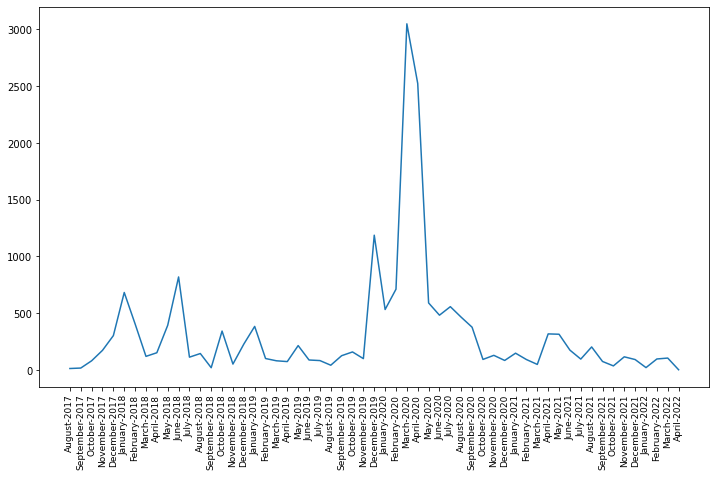

In [66]:
plt.figure(figsize=(12,7))
plt.plot(timeline["time"], timeline["messages"])
plt.xticks(rotation="vertical", fontsize=9)
plt.show()

In [51]:
df["only_date"] = df["date"].dt.date

In [52]:
daily_timeline = df.groupby("only_date").count()["messages"].reset_index()

In [53]:
daily_timeline.drop([0], inplace=True)

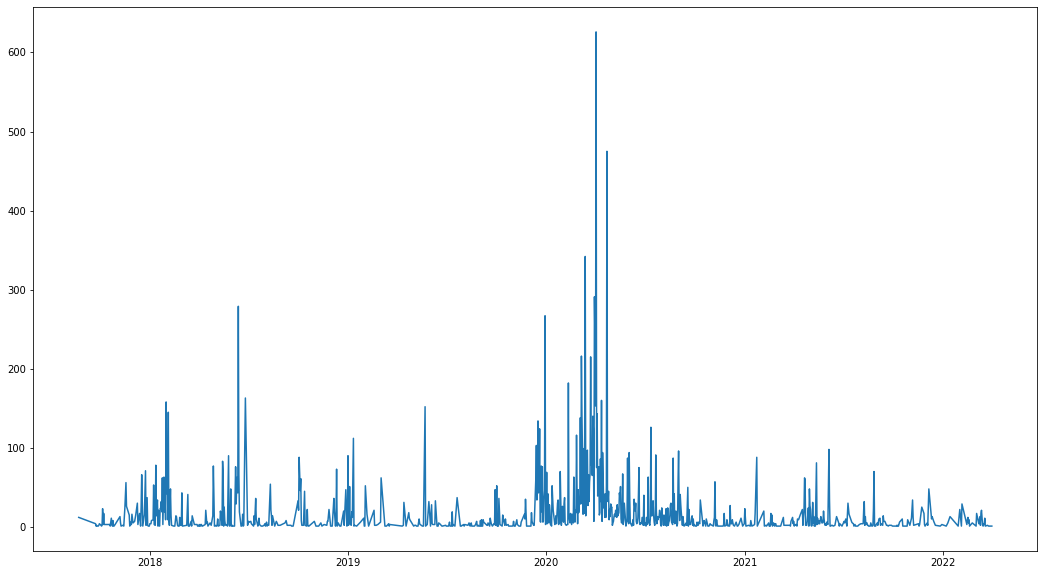

In [54]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline["only_date"], daily_timeline["messages"])

In [55]:
df.head()

,date,users,messages,year,month,day,hour,minute,month_num,only_date
0,2017-08-23 20:33:00,group_notification,Messages and calls are end-to-end encrypted. N...,2017,August,23,20,33,8,2017-08-23
1,2014-01-08 15:02:00,group_notification,"+91 98992 36546 created group ""bhai log""\n",2014,January,8,15,2,1,2014-01-08
2,2017-08-23 20:33:00,group_notification,Aqib Lko added you\n,2017,August,23,20,33,8,2017-08-23
3,2017-08-23 20:35:00,Dr. Jaun,12 number gali ke corner pe jo restaurant hai ...,2017,August,23,20,35,8,2017-08-23
4,2017-08-23 20:35:00,Nadeem Bhai,Pls save for me\n,2017,August,23,20,35,8,2017-08-23


In [56]:
df["day_name"] = df["date"].dt.day_name()

In [57]:
df["day_name"].value_counts()

Wednesday    2833
Saturday     2775
Tuesday      2737
Friday       2701
Thursday     2554
Monday       2307
Sunday       2282
Name: day_name, dtype: int64

In [58]:
period = []

for hour in df[["day_name", "hour"]]["hour"]:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [59]:
period

['20-21',
 '15-16',
 '20-21',
 '20-21',
 '20-21',
 '20-21',
 '20-21',
 '20-21',
 '20-21',
 '20-21',
 '20-21',
 '21-22',
 '22-23',
 '23-00',
 '23-00',
 '23-00',
 '23-00',
 '18-19',
 '00-1',
 '10-11',
 '6-7',
 '23-00',
 '9-10',
 '12-13',
 '15-16',
 '10-11',
 '10-11',
 '11-12',
 '11-12',
 '13-14',
 '15-16',
 '12-13',
 '00-1',
 '1-2',
 '16-17',
 '17-18',
 '18-19',
 '18-19',
 '18-19',
 '18-19',
 '18-19',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '23-00',
 '23-00',
 '23-00',
 '23-00',
 '23-00',
 '23-00',
 '23-00',
 '18-19',
 '19-20',
 '20-21',
 '12-13',
 '12-13',
 '12-13',
 '12-13',
 '12-13',
 '12-13',
 '12-13',
 '12-13',
 '13-14',
 '13-14',
 '13-14',
 '14-15',
 '14-15',
 '17-18',
 '17-18',
 '17-18',
 '21-22',
 '10-11',
 '18-19',
 '18-19',
 '11-12',
 '11-12',
 '11-12',
 '11-12',
 '15-16',
 '18-19',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '22-23',
 '15-16',
 '11-12',
 '11-12',
 '11-12',
 '13-14',
 '13-14

In [60]:
df["period"] = period

In [61]:
df.head()

,date,users,messages,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2017-08-23 20:33:00,group_notification,Messages and calls are end-to-end encrypted. N...,2017,August,23,20,33,8,2017-08-23,Wednesday,20-21
1,2014-01-08 15:02:00,group_notification,"+91 98992 36546 created group ""bhai log""\n",2014,January,8,15,2,1,2014-01-08,Wednesday,15-16
2,2017-08-23 20:33:00,group_notification,Aqib Lko added you\n,2017,August,23,20,33,8,2017-08-23,Wednesday,20-21
3,2017-08-23 20:35:00,Dr. Jaun,12 number gali ke corner pe jo restaurant hai ...,2017,August,23,20,35,8,2017-08-23,Wednesday,20-21
4,2017-08-23 20:35:00,Nadeem Bhai,Pls save for me\n,2017,August,23,20,35,8,2017-08-23,Wednesday,20-21


In [62]:
df.pivot_table(index='day_name', columns='period', values='messages', aggfunc='count')

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,90.0,17.0,70.0,102.0,82.0,114.0,170.0,148.0,92.0,163.0,...,343.0,268.0,190.0,NaN,1.0,3.0,1.0,5.0,17.0,79.0
Monday,70.0,56.0,185.0,81.0,272.0,85.0,84.0,51.0,28.0,284.0,...,289.0,145.0,137.0,1.0,18.0,4.0,3.0,3.0,25.0,38.0
Saturday,50.0,18.0,106.0,154.0,289.0,169.0,157.0,177.0,178.0,79.0,...,173.0,176.0,206.0,3.0,14.0,2.0,16.0,13.0,79.0,131.0
Sunday,158.0,48.0,51.0,247.0,303.0,193.0,157.0,127.0,73.0,79.0,...,97.0,93.0,87.0,NaN,25.0,42.0,3.0,6.0,19.0,31.0
Thursday,166.0,11.0,65.0,122.0,142.0,128.0,167.0,372.0,224.0,44.0,...,136.0,171.0,63.0,3.0,7.0,8.0,3.0,3.0,26.0,128.0
Tuesday,80.0,46.0,225.0,147.0,122.0,122.0,111.0,113.0,79.0,124.0,...,176.0,198.0,116.0,2.0,4.0,1.0,4.0,11.0,97.0,85.0
Wednesday,158.0,46.0,107.0,114.0,95.0,183.0,153.0,262.0,222.0,185.0,...,116.0,77.0,251.0,1.0,3.0,NaN,16.0,18.0,41.0,161.0


Here we have NaN values inside pivot_table. So we can use fillna to fill the NaN values

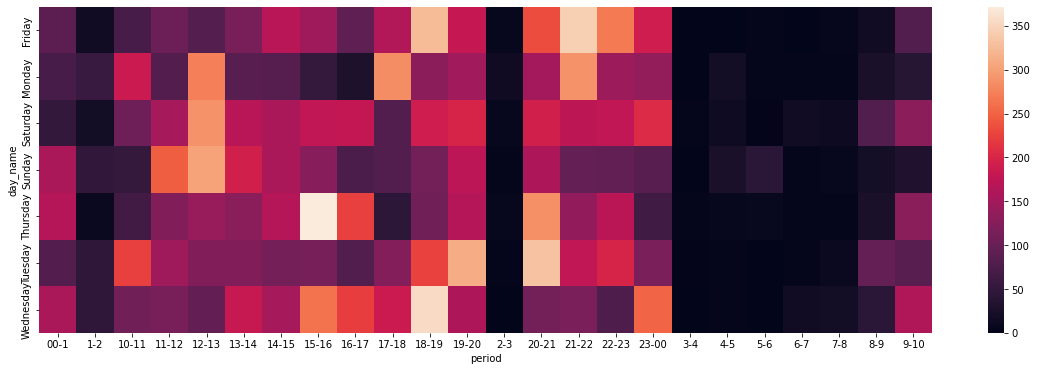

In [63]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='messages', aggfunc='count').fillna(0))
plt.yticks(rotation="vertical")
plt.show()